# Exercise3 Report(2)
Stochastic Gradient Descen

### student
student ID: 20161622
name : 이예은

In [0]:
%matplotlib inline
from fastai.basics import *

# import matplotlib library and fastai.basics

#  Linear Regression problem

The goal of linear regression is to fit a line to a set of points.

In [0]:
n=100

In [3]:
x = torch.ones(n,2) 
x[:,0].uniform_(-1.,1)
x[:5]

# create tensor
# uniform_ : getting random number between -1 and 1 and override column 0


tensor([[-0.0368,  1.0000],
        [-0.5751,  1.0000],
        [ 0.4794,  1.0000],
        [ 0.6980,  1.0000],
        [-0.8824,  1.0000]])

In [4]:
a = tensor(3.,2); a

# show tensor a

tensor([3., 2.])

In [0]:
y = x@a + torch.rand(n)

# @ : mattrix multiplication
# create y by random parameter(n)

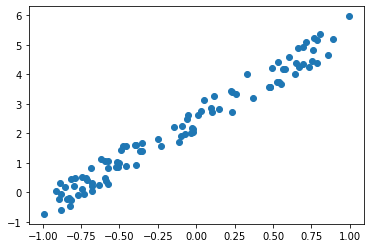

In [6]:
plt.scatter(x[:,0], y);
# show graph about x, y

We want to find `parameter` (a) such that having minimum error between the points and the line `y hat (x@a)`

The common *error function* or *loss function* is the **mean squared error**. 

In [0]:
def mse(y_hat, y): return ((y_hat-y)**2).mean()
# create function to return "mean squared error"

Suppose we believe `a = (-1.0,1.0)` then we can compute `y_hat` which is our *prediction* and then compute our error.

In [0]:
a = tensor(-1.,1)
# set tensor [-1, 1]

In [9]:
y_hat = x@a
mse(y_hat, y)

# comput y_hat(predicted result)
# and get "mean squared error"

tensor(6.5954)

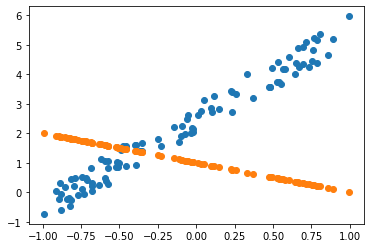

In [10]:
plt.scatter(x[:,0],y)
plt.scatter(x[:,0],y_hat);

# show result of y
# show result of y_hat

We have to find the best vlaue **parameter** `a`

# Gradient Descent

find the values of `a` that minimize `mse_loss`.

**Gradient descent**
*  an algorithm that minimizes functions. Given a function 
* defined by a set of parameters, gradient descent starts with an initial set of parameter values and iteratively moves toward a set of parameter values that minimize the function. 
* This iterative minimization is achieved by taking steps in the negative direction of the function gradient.


In [11]:
a = nn.Parameter(a); a

# get parameter 

Parameter containing:
tensor([-1.,  1.], requires_grad=True)

In [0]:
def update():
    y_hat = x@a #get y_hat(predicted result)
    loss = mse(y, y_hat) # get loss
    if t % 10 == 0: print(loss)
    loss.backward() #get gradient
    with torch.no_grad(): 
        a.sub_(lr * a.grad) #a.grad : direction, lr: learning rate, a.sub_: subscribe paramter 
        a.grad.zero_() # set grad zero

# create train model having one-dimensional function

In [13]:
lr = 1e-1
for t in range(100): update()
# set learning rate and train 100 times

tensor(6.5954, grad_fn=<MeanBackward0>)
tensor(1.5674, grad_fn=<MeanBackward0>)
tensor(0.4675, grad_fn=<MeanBackward0>)
tensor(0.1907, grad_fn=<MeanBackward0>)
tensor(0.1206, grad_fn=<MeanBackward0>)
tensor(0.1028, grad_fn=<MeanBackward0>)
tensor(0.0983, grad_fn=<MeanBackward0>)
tensor(0.0972, grad_fn=<MeanBackward0>)
tensor(0.0969, grad_fn=<MeanBackward0>)
tensor(0.0968, grad_fn=<MeanBackward0>)


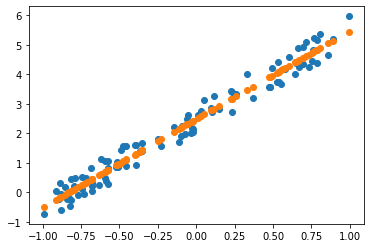

In [22]:
plt.scatter(x[:,0],y)
with torch.no_grad():
  plt.scatter(x[:,0],x@a);

# show y and y hat graph

## Animate it!

In [0]:
from matplotlib import animation, rc
rc('animation', html='jshtml')

# import matplotlib for animation

In [21]:
a = nn.Parameter(tensor(-1.,1))

fig = plt.figure()
plt.scatter(x[:,0], y, c='orange')
with torch.no_grad():
  line, = plt.plot(x[:,0], x@a)
plt.close()

def animate(i):
    update()
    with torch.no_grad():
      line.set_ydata(x@a)
    return line,

animation.FuncAnimation(fig, animate, np.arange(0, 100), interval=20)

# show graph animation

## Vocab

- **Learning rate**
 : how much chage the parameter 
- **Epoch**
  : how many times of traning 
- **Minibatch**
  : how many data trained at once 
- **SGD**
  : gradien descent
- **Model / Architecture**
  : Y = Xa
- **Parameters**
  : a (we have to get this value by trainng)
- **Loss function**
  : function return losses
